Problem 1

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
xi = np.array([25, 19, 13, 9, 5, 2.2, 1, 3, 8, 13, 18, 25])
yi = np.array([5, 7.5, 9.1, 9.4, 9, 7.5, 5, 2.1, 2, 3.5, 4.5, 5])

In [3]:
def ti(x, y):
    n = len(x)
    t = np.zeros(n)
    for i in range(1, n):
        t[i] = t[i-1] + math.sqrt((x[i] - x[i-1])**2 + (y[i] - y[i-1])**2)
        
    return t

In [4]:
t = ti(xi, yi)

In [5]:
t

array([ 0.        ,  6.5       , 12.70966988, 16.7209041 , 20.74085435,
       23.91733039, 26.69041531, 30.2131983 , 35.2141982 , 40.43435146,
       45.53337097, 52.55120539])

In [12]:
h = np.zeros(len(t) - 1)

In [13]:
for i in range(len(h)):
    h[i] = t[i+1] - t[i]

In [14]:
h

array([6.5       , 6.20966988, 4.01123422, 4.01995025, 3.17647603,
       2.77308492, 3.52278299, 5.0009999 , 5.22015325, 5.09901951,
       7.01783442])

In [14]:
h[len(t)-2]

7.017834423809099

In [12]:
t

array([ 0.        ,  6.5       , 12.70966988, 16.7209041 , 20.74085435,
       23.91733039, 26.69041531, 30.2131983 , 35.2141982 , 40.43435146,
       45.53337097, 52.55120539])

In [18]:
def cubic_spline(t, f, h):
    n = len(t)
    ai = np.zeros(n)
    bi = np.zeros(n-1)
    #ci = np.zeros(n)
    di = np.zeros(n-1)
    T = np.zeros((n-2, n-2))
    a = np.zeros(n-2)
    
    
    
    for i in range(n):
        ai[i] = f[i]
        
    T[0][0] = 2*(h[0] + h[1])
    T[0][1] = h[1]
    T[n-3][n-4] = h[n-3]
    T[n-3][n-3] = 2*(h[n-3]+h[n-2])
    
    for i in range(1, n-3):
        T[i][i-1] = h[i]
        T[i][i] = 2*(h[i]+h[i+1])
        T[i][i+1] = h[i+1]
    
    for i in range(n-2):
        a[i] = 3/h[i+1] * (ai[i+2] - ai[i+1]) - 3/h[i] * (ai[i+1] - ai[i])
        
    
    c = np.linalg.solve(T, a)
    c = np.insert(c, [0, n-2], 0)
    
    for i in range(n-2):
        bi[i] = 1/h[i]*(ai[i+1] - ai[i]) - h[i]/3 * (2*c[i] + c[i+1])
        di[i] = 1/(3*h[i])*(c[i+1] - c[i])
        
    result = np.vstack((ai[:n-1], bi, c[:n-1], di))
    return result

In [70]:
coeff = cubic_spline(t, xi, h)

In [24]:
coeff2 = cubic_spline(t, yi, h)

In [20]:
def cubic_output(t, x, coeff):
    S = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(t)-1):
            if (x[i] <= t[j+1]) & (x[i] >= t[j]):
                S[i] = coeff[0][j] + coeff[1][j]*(x[i] - t[j]) + coeff[2][j]*(x[i] - t[j])**2 + coeff[3][j]*(x[i] - t[j])**3
    
    return S
            
                
    

In [21]:
x = np.linspace(t[0], t[-1], 1000)

In [22]:
xt = cubic_output(t, x, coeff)

In [25]:
yt = cubic_output(t, x, coeff2 )

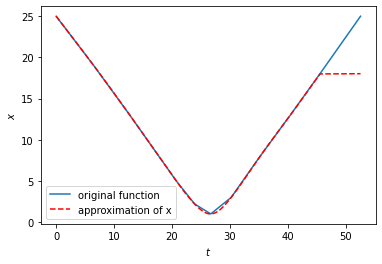

In [29]:
fig = plt.figure()
plt.plot(t, xi, label = "original function")
plt.plot(x, xt, '--r', label = "approximation of x")

plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.show()

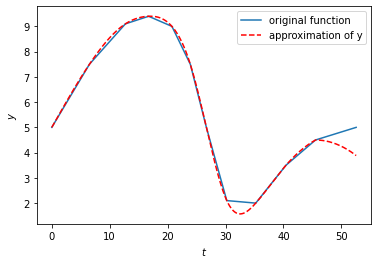

In [31]:
fig = plt.figure()
plt.plot(t, yi, label = "original function")
plt.plot(x, yt, '--r', label = "approximation of y")

plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [125]:
len(yt)

1000

In [112]:
yt

array([ 0.        ,  5.6548166 ,  6.30918085,  6.96264042,  7.61474296,
        8.26503613,  8.91306758,  9.55838497, 10.20053597, 10.83906821,
       11.47352937, 12.1034671 , 12.72842906,  8.15473619,  9.0169074 ,
        9.87258695, 10.72123199, 11.56229965, 12.39524708, 13.2195314 ,
       14.03460975, 14.83993927, 15.63497709, 16.41918036,  9.17649127,
       10.52301679, 11.85820915, 13.18259502, 14.49670104, 15.80105389,
       17.09618021, 18.38260666, 10.09562156, 11.47983191, 12.85179073,
       14.20860331, 15.54737493, 16.86521088, 18.15921644, 19.4264969 ,
       10.45201031, 11.98641199, 13.48346028, 14.93925143, 16.34988172,
       17.71144742,  8.42441236,  9.36298645, 10.26840532, 11.15098289,
       12.02103309,  4.90507771,  4.78159193,  4.6785538 ,  4.60746039,
        4.57980873,  4.60709589,  2.08869954,  1.99111049,  1.96265658,
        1.99607905,  2.08411912,  2.21951802,  2.39501698,  2.60335723,
        2.83728   ,  3.08952652,  2.24529487,  2.622576  ,  3.00

In [113]:
coeff

array([[ 2.50000000e+01,  1.90000000e+01,  1.30000000e+01,
         9.00000000e+00,  5.00000000e+00,  2.20000000e+00,
         1.00000000e+00,  3.00000000e+00,  8.00000000e+00,
         1.30000000e+01,  1.80000000e+01],
       [ 2.95249605e+00,  2.13262640e+00,  2.25195701e+00,
         1.14877793e+00,  1.82123696e-01, -1.03157448e+00,
        -6.39708411e-02,  1.53112553e+00,  2.52351925e+00,
         3.49382918e+00,  0.00000000e+00],
       [ 0.00000000e+00, -4.38463288e-03, -2.90185741e-03,
        -1.58225001e-03,  1.08312466e-02,  6.01735036e-02,
         2.14861670e-01,  3.66313936e-02, -1.70337567e-02,
         7.48911949e-03,  5.13619545e-04],
       [-2.24852968e-04,  7.95949704e-05,  1.09659299e-04,
         1.02932423e-03,  5.17788229e-03,  1.85939931e-02,
        -1.68645336e-02, -3.57696137e-03,  1.56591036e-03,
        -4.56002696e-04,  0.00000000e+00]])

Problem 2

(a)

### In order to construct piecewise cubic Hermite interpolation P, we use $P(t_i) = y_iH_0(t_i) + y_{i+1}H_1(t_i) + y'_ih_0(t_i) + y'_{i+1}h_1(t_i)$, where $t_i = \frac{x-x_i}{x_{i+1} - x_i}$.

(b)

In [36]:
def Runge(x):
    f = np.zeros(len(x))
    f_der = np.zeros(len(x))
    for i in range(len(x)):
        f[i] = 1/(1 + x[i]**2)
        f_der[i] = -2*x[i]/(1+x[i]**2)**2
    return f, f_der

In [46]:
def cubic_hermite_interpolation(x,X):
    y,y_der = Runge(x)
    n = len(X)
    P = []
    
    for i in range(n):
        j = np.where(X[i] <= x)[0][0]
        if j != 0:
            j = j-1
        
        ti = (X[i]-x[j])/(x[j+1]-x[j])
                
        H0 = 2*ti**3-3*ti**2+1
        H1 = -2*ti**3+3*ti**2
        h0 = ti**3-2*ti**2+ti
        h1 = ti**3-ti**2
        
        Hj = H0*y[j] + H1*y[j+1] + h0*y_der[j] + h1*y_der[j+1]
        P.append(Hj)
        
    return P

In [47]:
X = np.linspace(-5,5,100)
x1 = np.linspace(-5,5,5)
x2 = np.linspace(-5,5,10)

In [49]:
F, F_der = Runge(X)
f1, f1_der = Runge(x1)
f2, f2_der = Runge(x2)

In [51]:
Y1 = cubic_hermite_interpolation(x1,X)
Y2 = cubic_hermite_interpolation(x2,X)

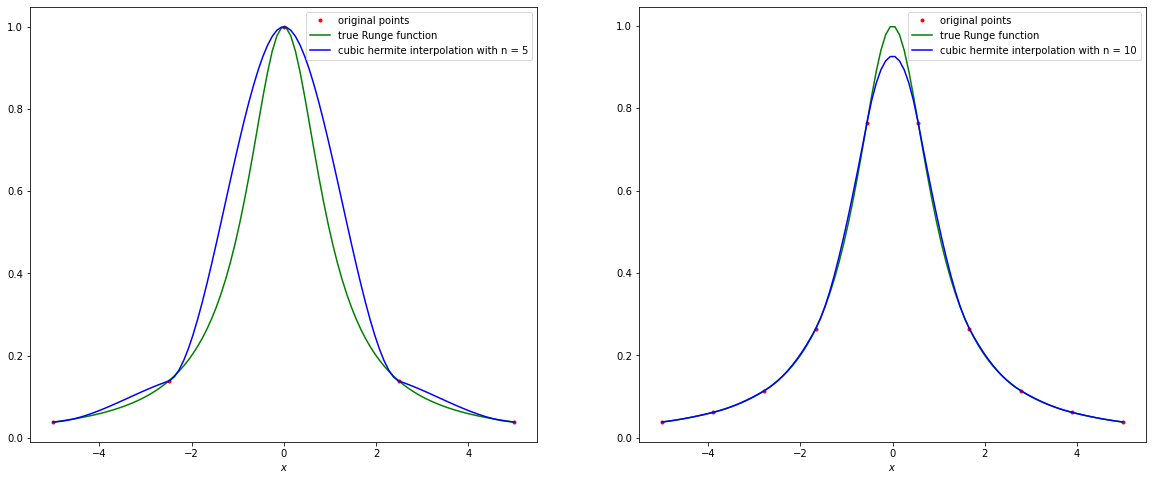

In [52]:
fig, axs = plt.subplots(1,2,figsize=(20,8))
axs[0].plot(x1, f1,'.r', label="original points")
axs[0].plot(X, F, 'g', label="true Runge function")
axs[0].plot(X, Y1, 'b', label="cubic hermite interpolation with n = 5")
axs[0].set_xlabel('$x$')
axs[0].legend()
axs[1].plot(x2, f2,'.r', label="original points")
axs[1].plot(X, F, 'g', label="true Runge function")
axs[1].plot(X, Y2, 'b', label="cubic hermite interpolation with n = 10")
axs[1].set_xlabel('$x$')
axs[1].legend()

Problem 4

(i)

#### $T(h) = \frac{h}{2}f(a) + h \sum_{i=1}^{n-1}f(a+ih) + \frac{h}{2}f(b)$

In [14]:
def trapezoidal_T(a,b,fun,tol):
    err = math.inf
    h = b-a
    n = 1
    fa = fun(a)
    fb = fun(b)
    h_p = []
    T_p = []
    err_p = []
    
    while err >= tol:
        T = 0
        for i in range(1,n):
            T = T + fun(a+i*h)
        T = h/2*(fa+fb) + h*T
        
        h = h/2
        n = 2*n
        T_ = 0
        for i in range(1,n):
            T_ = T_ + fun(a+i*h)
        T_ = h/2*(fa+fb) + h*T_
        
        aerr = abs(T-T_)
        err = abs(T-T_)/abs(T_)
        
        h_p.append(h)
        T_p.append(T_)
        err_p.append(err)
    
    info = {'h/2': h_p, 'T(h/2)': T_p, '|T(h)-T(h/2)|/|T(h/2)|': err_p}
    print(tabulate(info, headers='keys'))
    return ("%10.8e"%T_), ("%10.8e"%aerr), ("%10.8e"%err), n+1

(ii)

#### $S(h)=\frac{h}{6}f(a) + \frac{2h}{3} \sum_{i=0}^{n-1}f(a+(i+\frac{1}{2}h)) + \frac{h}{3} \sum_{i=1}^{n-1}f(a+ih) + \frac{f}{6}f(b)$

In [15]:
def trapezoidal_S(a,b,fun,tol):
    err = math.inf
    h = b-a
    n = 1
    fa = fun(a)
    fb = fun(b)
    h_p = []
    T_p = []
    err_p = []
    
    while err >= tol:
        T1 = 0
        T2 = 0
        for i in range(n):
            T1 = T1 + fun(a+(i+0.5)*h)
        for i in range(1,n):
            T2 = T2 + fun(a+i*h)
            
        T = h/6*(fa+fb) + 2*h/3*T1 + h/3*T2
        
        h = h/2
        n = 2*n
        T1_ = 0
        T2_ = 0
        for i in range(n):
            T1_ = T1_ + fun(a+(i+0.5)*h)
        for i in range(1,n):
            T2_ = T2_ + fun(a+i*h)
        T_ = h/2*(fa+fb) + 2*h/3*T1_ + h/3*T2_
        
        aerr = abs(T-T_)
        err = abs(T-T_)/abs(T_)
        
        h_p.append(h)
        T_p.append(T_)
        err_p.append(err)
    
    info = {'h/2': h_p, 'T(h/2)': T_p, '|T(h)-T(h/2)|/|T(h/2)|': err_p}
    print(tabulate(info, headers='keys'))
    return ("%10.8e"%T_), ("%10.8e"%aerr), ("%10.8e"%err), n+1

(iv)

In [16]:
def fun1(x):
    return x/(1+x**2)

def fun2(x):
    return 1/(1-x)

def fun3(x):
    return (1/math.sqrt(1-0.5*(math.sin(x))**2))

def fun4(x):
    return (1/math.sqrt(1-0.8*(math.sin(x))**2))

def fun5(x):
    return (1/math.sqrt(1-0.95*(math.sin(x))**2))

In [17]:
def print_res1(a,b,fun,tv):
    print("Composite trapezoidal rule")
    print("Approximate value of the integral = ", "%10.7e"% float(tav))
    print("Absolute error                    = ", "%10.7e"% (abs(float(tav)-tv)))
    print("Relative error                    = ", "%10.7e"% (abs(float(tav)-tv)/abs(tv)))
    print("Number of f evaluations required  =   ", tn)
    print()
    print("Composite Simpson rule")
    print("Approximate value of the integral = ", "%10.7e"% float(sav))
    print("Absolute error                    = ", "%10.7e"% (abs(float(sav)-tv)))
    print("Relative error                    = ", "%10.7e"% (abs(float(sav)-tv)/abs(tv)))
    print("Number of f evaluations required  =   ", sn)

In [18]:
def print_res2(a,b,fun):
    print("Composite trapezoidal rule")
    print("Approximate value of the integral = ", "%10.7e"% float(tav))
    print("Number of f evaluations required  =   ", tn)
    print()
    print("Composite Simpson rule")
    print("Approximate value of the integral = ", "%10.7e"% float(sav))
    print("Number of f evaluations required  =   ", sn)

### $\int_0^3{\frac{x}{1+x^2}}dx = \frac{1}{2}log(10)$

In [19]:
(tav, tae, tre, tn) = trapezoidal_T(0,3,fun1,1.e-6)

       h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
----------  --------  ------------------------
1.5         0.917308               0.509434
0.75        1.097                  0.163807
0.375       1.13846                0.0364126
0.1875      1.14812                0.00841331
0.09375     1.1505                 0.00207114
0.046875    1.15109                0.000515914
0.0234375   1.15124                0.000128863
0.0117188   1.15128                3.22087e-05
0.00585938  1.15129                8.05172e-06
0.00292969  1.15129                2.0129e-06
0.00146484  1.15129                5.03224e-07


In [20]:
(sav, sae, sre, sn) = trapezoidal_S(0,3,fun1,1.e-6)

        h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
-----------  --------  ------------------------
1.5           1.3069                0.178916
0.75          1.22728               0.0573411
0.375         1.18884               0.0307537
0.1875        1.17005               0.0159885
0.09375       1.16067               0.00807513
0.046875      1.15598               0.00405487
0.0234375     1.15364               0.00203161
0.0117188     1.15246               0.00101684
0.00585938    1.15188               0.00050868
0.00292969    1.15159               0.000254405
0.00146484    1.15144               0.000127219
0.000732422   1.15137               6.36133e-05
0.000366211   1.15133               3.18077e-05
0.000183105   1.15131               1.59041e-05
9.15527e-05   1.1513                7.95211e-06
4.57764e-05   1.1513                3.97607e-06
2.28882e-05   1.15129               1.98804e-06
1.14441e-05   1.15129               9.9402e-07


In [21]:
tv = 0.5*math.log(10)
print("f(x)=x/(1+x^2), [a,b] = [0,3]")
print_res1(0,3,fun1,tv)

f(x)=x/(1+x^2), [a,b] = [0,3]
Composite trapezoidal rule
Approximate value of the integral =  1.1512924e+00
Absolute error                    =  1.9649702e-07
Relative error                    =  1.7067515e-07
Number of f evaluations required  =    2049

Composite Simpson rule
Approximate value of the integral =  1.1512937e+00
Absolute error                    =  1.1435030e-06
Relative error                    =  9.9323407e-07
Number of f evaluations required  =    262145


### $\int_0^{0.95}{\frac{1}{1-x}}dx = log(20)$

In [22]:
(tav, tae, tre, tn) = trapezoidal_T(0,0.95,fun2,1.e-6)

        h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
-----------  --------  ------------------------
0.475         5.89226               0.692898
0.2375        4.08369               0.442876
0.11875       3.35708               0.216444
0.059375      3.10177               0.082309
0.0296875     3.02413               0.025673
0.0148437     3.003                 0.00703872
0.00742187    2.99756               0.00181362
0.00371094    2.99619               0.000457218
0.00185547    2.99585               0.000114552
0.000927734   2.99576               2.86535e-05
0.000463867   2.99574               7.16436e-06
0.000231934   2.99573               1.79115e-06
0.000115967   2.99573               4.47792e-07


In [23]:
(sav, sae, sre, sn) = trapezoidal_S(0,0.95,fun2,1.e-6)

        h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
-----------  --------  ------------------------
0.475         6.80584               0.334197
0.2375        4.77737               0.271391
0.11875       3.84792               0.190506
0.059375      3.41388               0.116351
0.0296875     3.20376               0.0641461
0.0148437     3.09965               0.0334565
0.00742187    3.04769               0.017042
0.00371094    3.02171               0.00859634
0.00185547    3.00872               0.00431686
0.000927734   3.00223               0.00216311
0.000463867   2.99898               0.00108273
0.000231934   2.99736               0.000541656
0.000115967   2.99654               0.000270901
5.79834e-05   2.99614               0.000135469
2.89917e-05   2.99594               6.77391e-05
1.44958e-05   2.99583               3.38707e-05
7.24792e-06   2.99578               1.69356e-05
3.62396e-06   2.99576               8.46789e-06
1.81198e-06   2.99574               4.23396e-06
9.05991e-07   2

In [24]:
tv = math.log(20)
print("f(x)=1/(1-x), [a,b] = [0,0.95]")
print_res1(0,0.95,fun2,tv)

f(x)=1/(1-x), [a,b] = [0,0.95]
Composite trapezoidal rule
Approximate value of the integral =  2.9957327e+00
Absolute error                    =  4.4644601e-07
Relative error                    =  1.4902734e-07
Number of f evaluations required  =    8193

Composite Simpson rule
Approximate value of the integral =  2.9957339e+00
Absolute error                    =  1.5864460e-06
Relative error                    =  5.2956869e-07
Number of f evaluations required  =    4194305


### $\int_0^{\pi/2}{\frac{1}{\sqrt{1-msin^2(x)}}}dx, m=0.5$

In [74]:
(tav, tae, tre, tn) = trapezoidal_T(0,math.pi/2,fun3,1.e-6)

     h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
--------  --------  ------------------------
0.785398   1.85496               0.022189
0.392699   1.85408               0.000476735
0.19635    1.85407               2.96895e-07


In [75]:
(sav, sae, sre, sn) = trapezoidal_S(0,math.pi/2,fun3,1.e-6)

        h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
-----------  --------  ------------------------
0.785398      2.48582               0.259303
0.392699      2.17009               0.14576
0.19635       2.01208               0.0785305
0.0981748     1.93308               0.04087
0.0490874     1.89358               0.0208613
0.0245437     1.87383               0.0105406
0.0122718     1.86395               0.00529822
0.00613592    1.85901               0.00265615
0.00306796    1.85654               0.00132984
0.00153398    1.85531               0.000665362
0.00076699    1.85469               0.000332792
0.000383495   1.85438               0.000166424
0.000191748   1.85423               8.32187e-05
9.58738e-05   1.85415               4.16111e-05
4.79369e-05   1.85411               2.0806e-05
2.39684e-05   1.85409               1.04031e-05
1.19842e-05   1.85408               5.20158e-06
5.99211e-06   1.85408               2.60079e-06
2.99606e-06   1.85408               1.3004e-06
1.49803e-06   

In [76]:
print("f(x)=1/sqrt(1-msin^2x), [a,b] = [0,pi/2]")
print_res2(0,math.pi/2,fun3)

f(x)=1/sqrt(1-msin^2x), [a,b] = [0,pi/2]
Composite trapezoidal rule
Approximate value of the integral =  1.8540747e+00
Number of f evaluations required  =    9

Composite Simpson rule
Approximate value of the integral =  1.8540759e+00
Number of f evaluations required  =    1048577


### $\int_0^{\pi/2}{\frac{1}{\sqrt{1-msin^2(x)}}}dx, m=0.8$

In [77]:
(tav, tae, tre, tn) = trapezoidal_T(0,math.pi/2,fun4,1.e-6)

      h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
---------  --------  ------------------------
0.785398    2.28475               0.112422
0.392699    2.25762               0.0120144
0.19635     2.25721               0.000184328
0.0981748   2.25721               5.96498e-08


In [78]:
(sav, sae, sre, sn) = trapezoidal_S(0,math.pi/2,fun4,1.e-6)

        h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
-----------  --------  ------------------------
0.785398      3.09578               0.289637
0.392699      2.68067               0.161186
0.19635       2.46901               0.0858397
0.0981748     2.36311               0.044814
0.0490874     2.31016               0.0229206
0.0245437     2.28368               0.0115931
0.0122718     2.27044               0.00583036
0.00613592    2.26382               0.00292371
0.00306796    2.26051               0.00146399
0.00153398    2.25886               0.000732533
0.00076699    2.25803               0.000366401
0.000383495   2.25762               0.000183234
0.000191748   2.25741               9.16253e-05
9.58738e-05   2.25731               4.58148e-05
4.79369e-05   2.25726               2.29079e-05
2.39684e-05   2.25723               1.14541e-05
1.19842e-05   2.25722               5.72707e-06
5.99211e-06   2.25721               2.86355e-06
2.99606e-06   2.25721               1.43177e-06
1.49803e-0

In [79]:
print("f(x)=1/sqrt(1-msin^2x), [a,b] = [0,pi/2]")
print_res2(0,math.pi/2,fun4)

f(x)=1/sqrt(1-msin^2x), [a,b] = [0,pi/2]
Composite trapezoidal rule
Approximate value of the integral =  2.2572053e+00
Number of f evaluations required  =    17

Composite Simpson rule
Approximate value of the integral =  2.2572069e+00
Number of f evaluations required  =    1048577


### $\int_0^{\pi/2}{\frac{1}{\sqrt{1-msin^2(x)}}}dx, m=0.95$

In [80]:
(tav, tae, tre, tn) = trapezoidal_T(0,math.pi/2,fun5,1.e-6)

      h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
---------  --------  ------------------------
0.785398    3.23286               0.329415
0.392699    2.94267               0.0986139
0.19635     2.90897               0.0115828
0.0981748   2.90834               0.000218584
0.0490874   2.90834               1.07601e-07


In [81]:
(sav, sae, sre, sn) = trapezoidal_S(0,math.pi/2,fun5,1.e-6)

        h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
-----------  --------  ------------------------
0.785398      4.27854               0.327371
0.392699      3.61404               0.212533
0.19635       3.26628               0.11283
0.0981748     3.08741               0.0580702
0.0490874     2.99787               0.0298671
0.0245437     2.95311               0.0151599
0.0122718     2.93072               0.00763785
0.00613592    2.91953               0.00383356
0.00306796    2.91393               0.00192046
0.00153398    2.91114               0.000961154
0.00076699    2.90974               0.000480808
0.000383495   2.90904               0.000240462
0.000191748   2.90869               0.000120245
9.58738e-05   2.90851               6.01263e-05
4.79369e-05   2.90842               3.00641e-05
2.39684e-05   2.90838               1.50323e-05
1.19842e-05   2.90836               7.51619e-06
5.99211e-06   2.90835               3.75811e-06
2.99606e-06   2.90834               1.87906e-06
1.49803e-06

In [82]:
print("f(x)=1/sqrt(1-msin^2x), [a,b] = [0,pi/2]")
print_res2(0,math.pi/2,fun5)

f(x)=1/sqrt(1-msin^2x), [a,b] = [0,pi/2]
Composite trapezoidal rule
Approximate value of the integral =  2.9083373e+00
Number of f evaluations required  =    33

Composite Simpson rule
Approximate value of the integral =  2.9083400e+00
Number of f evaluations required  =    1048577


Problem 5

(i)

I do not recommend this algorithm. In this algorithm, we computed weights vector w by solving the linear system $A*w = b$, where A is the vandermonde matrix. That is to say, $w = A^-1*b$. However, in assignment 5, we have computed the condition number of A based on different n, and discovered that condition number of A is can be very large if n is relatively large. This would lead to large computation error, making the weights wi's inaccurate.

(ii)

In [5]:
def alg1(fun):
    for n in (5,10,15):
        x = np.zeros(n+1)
        for i in range(n+1):
            x[i] = -5 + i*10/n
        
        X = np.ones((n+1,n+1))
        for i in range(1,n+1):
            X[i:] = x**i
        
        a, b = -5, 5
        d = np.zeros(n+1)
        for i in range(n+1):
            d[i] = 1/(i+1)*(b**(i+1) - a**(i+1))
        
        w = np.linalg.solve(X, d)
        
        f = fun(x)
        p = np.inner(w,f)
        
        print("n = ", n)
        print("Nodes: ")
        print(x)
        print("weights: ")
        print(w)
        print("computed approximation of the integral: ", p)
        print()

In [6]:
def fun(x):
    return 1/(1+x**2)

In [7]:
alg1(fun)

n =  5
Nodes: 
[-5. -3. -1.  1.  3.  5.]
weights: 
[0.65972222 2.60416667 1.73611111 1.73611111 2.60416667 0.65972222]
computed approximation of the integral:  2.3076923076923093

n =  10
Nodes: 
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
weights: 
[ 0.26834148  1.77535941 -0.81043571  4.54946288 -4.35155123  7.1376463
 -4.35155123  4.54946288 -0.81043571  1.77535941  0.26834148]
computed approximation of the integral:  4.673300555670888

n =  15
Nodes: 
[-5.         -4.33333333 -3.66666667 -3.         -2.33333333 -1.66666667
 -1.         -0.33333333  0.33333333  1.          1.66666667  2.33333333
  3.          3.66666667  4.33333333  5.        ]
weights: 
[ 0.170873    1.28507379 -1.12722905  5.07042708 -7.56293114 11.91360348
 -9.68005208  4.93023492  4.93023496 -9.68005211 11.91360349 -7.56293115
  5.07042708 -1.12722905  1.28507379  0.170873  ]
computed approximation of the integral:  4.155558988017933



### We can see that the approximation of the integral is very unstable. When n = 10 or 15, the approximation is around two times that when n = 5. 

(iii)

### We choose chebyshev points for better quadrature nodes

In [10]:
def Chebyshev(a,b,n):
    x = np.zeros(n)
    for i in range(n):
        x[i] = (a+b)/2 + (b-a)/2*math.cos((2*(i+1)-1)*math.pi/(2*n))
    return x

In [11]:
def alg2(a,b,fun):
    for n in (5,10,15):
        x = Chebyshev(a,b,n+1)
        
        X = np.ones((n+1,n+1))
        for i in range(1,n+1):
            X[i:] = x**i
        
        a, b = -5, 5
        d = np.zeros(n+1)
        for i in range(n+1):
            d[i] = 1/(i+1)*(b**(i+1) - a**(i+1))
        
        w = np.linalg.solve(X, d)
        
        f = fun(x)
        p = np.inner(w,f)
        
        print("n = ", n)
        print("Nodes: ")
        print(x)
        print("Weights: ")
        print(w)
        print("Computed approximation of the integral: ", p)
        print()

In [13]:
alg2(-5,5,fun)

n =  5
Nodes: 
[ 4.82962913  3.53553391  1.29409523 -1.29409523 -3.53553391 -4.82962913]
Weights: 
[0.59330511 1.88888889 2.517806   2.517806   1.88888889 0.59330511]
Computed approximation of the integral:  2.2113115356791346

n =  10
Nodes: 
[ 4.94910721e+00  4.54815998e+00  3.77874787e+00  2.70320409e+00
  1.40866278e+00  1.41638472e-15 -1.40866278e+00 -2.70320409e+00
 -3.77874787e+00 -4.54815998e+00 -4.94910721e+00]
Weights: 
[0.17698858 0.60847767 0.92441624 1.20994808 1.36247298 1.43539289
 1.36247298 1.20994808 0.92441624 0.60847767 0.17698858]
Computed approximation of the integral:  2.8307823662995624

n =  15
Nodes: 
[ 4.97592363  4.78470168  4.40960632  3.86505227  3.17196642  2.35698368
  1.45142339  0.4900857  -0.4900857  -1.45142339 -2.35698368 -3.17196642
 -3.86505227 -4.40960632 -4.78470168 -4.97592363]
Weights: 
[0.08401378 0.29168232 0.45859157 0.62564809 0.75696231 0.86709706
 0.93874864 0.97725624 0.97725624 0.93874864 0.86709706 0.75696231
 0.62564809 0.45859157 0.

### We can see that the approximation of the integral becomes much more stable compared to (ii). All of the approximations are greater than 2 and less than 3.

(iv)

In [90]:
(tav, tae, tre, tn) = trapezoidal_T(-5,5,fun,1.e-4)

    h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
-------  --------  ------------------------
5         5.19231               0.925926
2.5       3.28581               0.580222
1.25      2.78449               0.18004
0.625     2.74611               0.0139753
0.3125    2.74656               0.000163595
0.15625   2.74674               6.56813e-05


In [91]:
(sav, sae, sre, sn) = trapezoidal_S(-5,5,fun,1.e-4)

       h/2    T(h/2)    |T(h)-T(h/2)|/|T(h/2)|
----------  --------  ------------------------
5            2.77851               1.44551
2.5          2.68149               0.0116264
1.25         2.76537               0.0535145
0.625        2.76274               0.0106479
0.3125       2.75481               0.00294161
0.15625      2.75081               0.00145646
0.078125     2.7488                0.000728756
0.0390625    2.7478                0.00036451
0.0195312    2.7473                0.000182288
0.00976562   2.74705               9.11525e-05


In [92]:
print("f(x)=x/(1+x^2), [a,b] = [-5,5]")
print("Composite trapezoidal rule")
print("Approximate value of the integral = ", "%10.7e"% float(tav))
print("Number of f evaluations required  =   ", tn)
print()
print("Composite Simpson rule")
print("Approximate value of the integral = ", "%10.7e"% float(sav))
print("Number of f evaluations required  =   ", sn)

f(x)=x/(1+x^2), [a,b] = [-5,5]
Composite trapezoidal rule
Approximate value of the integral =  2.7467414e+00
Number of f evaluations required  =    65

Composite Simpson rule
Approximate value of the integral =  2.7470519e+00
Number of f evaluations required  =    1025
